In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from autoencoder import *
from metrics import *

In [2]:
x, y = load_breast_cancer(return_X_y=True,as_frame=False)
x_df, y_df = load_breast_cancer(return_X_y=True,as_frame=True)
x_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.70, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

In [4]:
x_train.shape


(398, 30)

In [5]:
# 1. Calculate min and max for each column
x_min = np.min(x_train, axis=0)
x_max = np.max(x_train, axis=0)

# 2. Calculate the range (handle potential division by zero)
data_range = x_max - x_min
data_range[data_range == 0] = 1.0  # If a column is all the same value, set range to 1

# 3. Apply the formula
x_train_scaled = (x_train - x_min) / data_range
x_val_scaled = (x_val - x_min) / data_range
x_test_scaled = (x_test - x_min) / data_range

# Verify the results
print(f"New Min: {np.min(x_train_scaled)}") # Should be 0.0
print(f"New Max: {np.max(x_train_scaled)}") # Should be 1.0

New Min: 0.0
New Max: 1.0


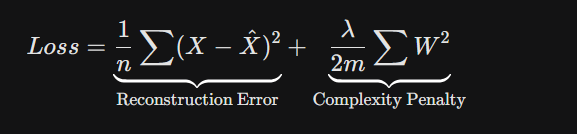

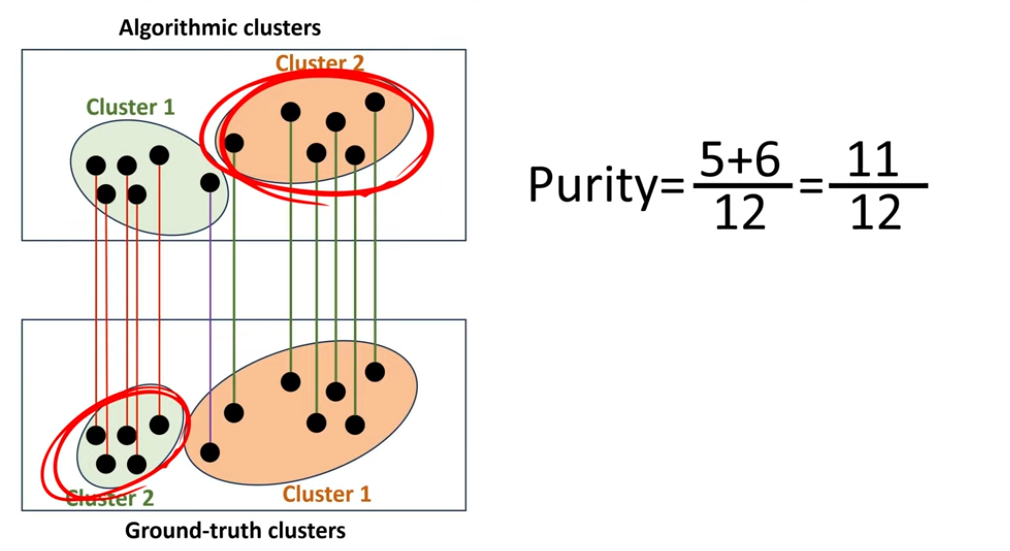

In [6]:
def plot_history(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history['mse_loss'], label='Reconstruction MSE', color='blue', linewidth=2)
    plt.plot(history['total_loss'], label='Total Loss (MSE + L2)', color='orange', linestyle='--')

    plt.title('Training Progress: Total Loss vs. Reconstruction Error')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.grid(True, linestyle=':', alpha=0.6) # Adds a subtle grid for easier reading
    plt.legend() # This is the "magic" line that shows the labels

    plt.show()

Epoch 0 - Total Loss: 0.1555 - Reconstruction MSE: 0.092548
Epoch 10 - Total Loss: 0.0867 - Reconstruction MSE: 0.023354
Epoch 20 - Total Loss: 0.0796 - Reconstruction MSE: 0.016162
Epoch 30 - Total Loss: 0.0786 - Reconstruction MSE: 0.015259
Epoch 40 - Total Loss: 0.0783 - Reconstruction MSE: 0.014918
Epoch 50 - Total Loss: 0.0776 - Reconstruction MSE: 0.014266
Epoch 60 - Total Loss: 0.0773 - Reconstruction MSE: 0.013998
Epoch 70 - Total Loss: 0.0772 - Reconstruction MSE: 0.013948
Epoch 80 - Total Loss: 0.0773 - Reconstruction MSE: 0.013984
Epoch 90 - Total Loss: 0.0770 - Reconstruction MSE: 0.013693
Epoch 99 - Total Loss: 0.0772 - Reconstruction MSE: 0.013938


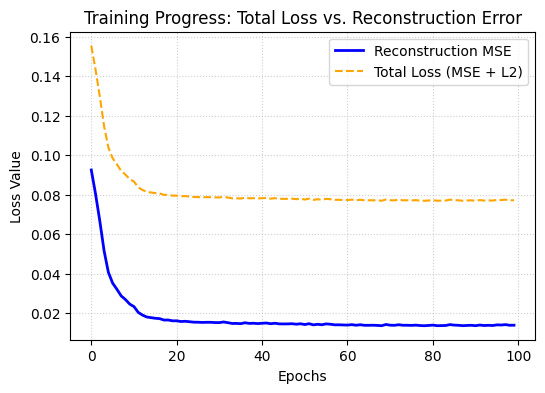

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from autoencoder import *
# 1. Initialize
model = Autoencoder(
    input_dim=x_train.shape[1],
    encoder_dims=[30, 28, 24], # 3 hidden layers for encoder
    bottleneck_dim=5,         # The compressed representation
    decoder_dims=[24, 28, 30], # 3 hidden layers for decoder
    activation='relu',
    learning_rate=0.01,
    l2_lambda=0.01
)

# 2. Train (Fit)
history = model.fit(x_train_scaled, epochs=100, batch_size=32, lr_schedule='cosine')
plot_history(history)

# Experiments

## diffrent number of bottlneck sizes

In [8]:
bottle_neck_sizes = [ 2, 5, 10, 15, 20]
for i in bottle_neck_sizes:
  print(f"Bottleneck size {i}: ")
  autoencoder = Autoencoder(
    input_dim=x_train.shape[1],
    encoder_dims=[30, 28, 24], # 3 hidden layers for encoder
    bottleneck_dim=i,         # The compressed representation
    decoder_dims=[24, 28, 30], # 3 hidden layers for decoder
    activation='relu',
    learning_rate=0.01,
    l2_lambda=0.01
)
  autoencoder.fit(x_train_scaled, verbose=False)

Bottleneck size 2: 
Bottleneck size 5: 
Bottleneck size 10: 
Bottleneck size 15: 
Bottleneck size 20: 


In [9]:
# Transform the scaled data into the compressed representation
# This moves data from (N, input_dim) -> (N, bottleneck_dim)
X_latent = model.encode(x_train_scaled)
print(f"Shape beofre encoding: {x_train_scaled.shape}")
print(f"Shape after encoding: {X_latent.shape}")

Shape beofre encoding: (398, 30)
Shape after encoding: (398, 5)


# Kmeans with autoencoder

## kmeans with autoencoder


Evaluating Bottleneck size 2...
MSE: 0.013800| WCSS: 2.23 | Silhouette: 0.3795 | db_idx: 0.8448 | ch_idx: 1056.7545882049067 | ARI: 0.1377 | Purity: 0.9186 | NMI: 0.2840

Evaluating Bottleneck size 5...
MSE: 0.014009| WCSS: 5.56 | Silhouette: 0.4085 | db_idx: 0.7560 | ch_idx: 2059.887349242541 | ARI: 0.0998 | Purity: 0.9186 | NMI: 0.2657

Evaluating Bottleneck size 10...
MSE: 0.011457| WCSS: 28.48 | Silhouette: 0.2305 | db_idx: 1.2534 | ch_idx: 208.28240760974447 | ARI: 0.1437 | Purity: 0.9302 | NMI: 0.3144

Evaluating Bottleneck size 15...
MSE: 0.011264| WCSS: 51.01 | Silhouette: 0.2431 | db_idx: 1.1254 | ch_idx: 159.90766032699466 | ARI: 0.1418 | Purity: 0.9070 | NMI: 0.2681

Evaluating Bottleneck size 20...
MSE: 0.012188| WCSS: 61.49 | Silhouette: 0.2561 | db_idx: 1.2922 | ch_idx: 286.17480708009117 | ARI: 0.1939 | Purity: 0.9302 | NMI: 0.3258


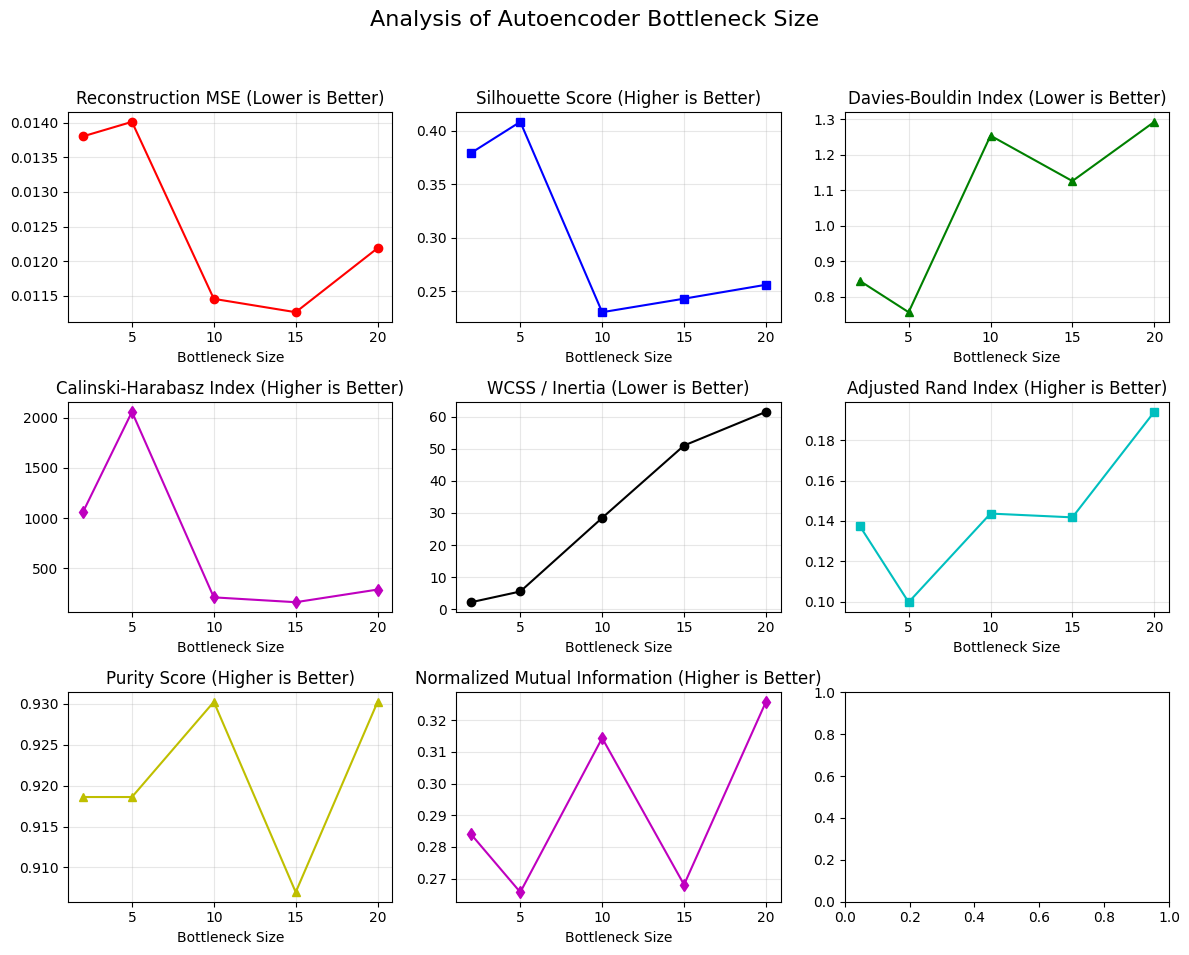

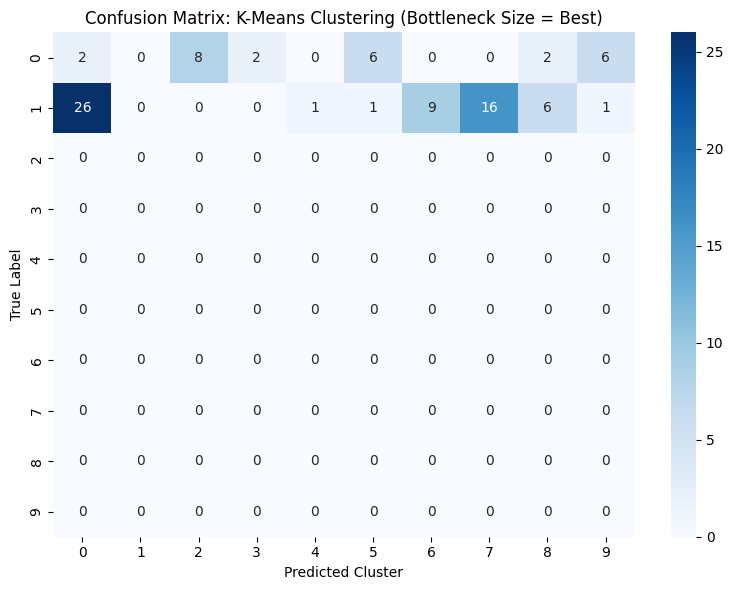

In [ ]:
from autoencoder import *
from metrics import *
from kmeans import *
from sklearn.metrics import adjusted_rand_score # TODO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


metrics = ClusteringMetrics()

bottle_neck_sizes = [2, 5, 10, 15, 20]
results = {
    'size': [],
    'mse': [],
    'silhouette': [],
    'db_idx': [],
    'ch_idx': [],
    'wcss': [],
    'ari': [],
    'pur': [],
    'nmi': []
}

for i in bottle_neck_sizes:
    print(f"\nEvaluating Bottleneck size {i}...")

    # 1. Initialize and Train
    autoencoder = Autoencoder(x_train_scaled.shape[1], [30, 28, 24], i, [24, 28, 30], 'relu', 0.01, 0.01)
    autoencoder.fit(x_train_scaled, epochs=50, verbose=False)
    # 2. Get Reconstruction Loss (MSE)
    mse = autoencoder.evaluate_mse(x_train_scaled)
    # 3. Get Compressed Features (Bottleneck)
    encoded_train_features = autoencoder.encode(x_train_scaled)
    encoded_test_features = autoencoder.encode(x_test_scaled)

    # 4. Apply K-Means
    k = 10  # Number of clusters
    centroids = initialize(encoded_train_features, k)
    train_centroids, train_clusters, _, _ = kmeans(data=encoded_train_features, centroids=centroids, tolerance=1e-4, max_iterations=100)
    test_clusters = assign_to_clusters(encoded_test_features, train_centroids)

    # 5. Calculate Performance Metrics
    sil = metrics.silhouette_score(encoded_train_features, train_clusters)
    db_idx = metrics.davies_bouldin_index(encoded_train_features, train_clusters)
    ch_idx = metrics.calinski_harabasz_index(encoded_train_features, train_clusters)
    wcss = metrics.within_cluster_sum(train_centroids, encoded_train_features, train_clusters)
    ari = metrics.adjusted_rand_index_scratch(y_test, test_clusters)
    pur = metrics.calculate_purity(y_test, test_clusters) 
    nmi = metrics.normalized_mutual_info_score_scratch(y_test, test_clusters)

    # Store results
    results['size'].append(i)
    results['mse'].append(mse)
    results['silhouette'].append(sil) # A higher silhouette Indicates that the samples are far from the neighboring clusters (very well clustered)
    results['db_idx'].append(db_idx) # A lower DBI value indicates better clustering (tight clusters that are far apart)
    results['ch_idx'].append(ch_idx) # Higher values indicate better defined, more separated clusters TODO
    results['wcss'].append(wcss) # A lower value indicates data points are closer to their cluster's centroids TODO
    results['ari'].append(ari) # A higher ARI indicates a better match between the clustering and the ground truth labels
    results['pur'].append(pur) # A higher purity indicates better clustering quality
    results['nmi'].append(nmi) # A higher NMI indicates a better match between the clustering and the ground truth labels

    print(f"MSE: {mse:.6f}| WCSS: {wcss:.2f} | Silhouette: {sil:.4f} | db_idx: {db_idx:.4f} | ch_idx: {ch_idx} | ARI: {ari:.4f} | Purity: {pur:.4f} | NMI: {nmi:.4f}")

# --- Visualization ---
# Create a figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Analysis of Autoencoder Bottleneck Size', fontsize=16)

# 1. Reconstruction MSE (Lower is Better)
axs[0, 0].plot(results['size'], results['mse'], 'r-o')
axs[0, 0].set_title('Reconstruction MSE (Lower is Better)')
axs[0, 0].set_xlabel('Bottleneck Size')
axs[0, 0].grid(True, alpha=0.3)

# 2. Silhouette Score (Higher is Better)
axs[0, 1].plot(results['size'], results['silhouette'], 'b-s')
axs[0, 1].set_title('Silhouette Score (Higher is Better)')
axs[0, 1].set_xlabel('Bottleneck Size')
axs[0, 1].grid(True, alpha=0.3)

# 3. Davies-Bouldin Index (Lower is Better)
axs[0, 2].plot(results['size'], results['db_idx'], 'g-^')
axs[0, 2].set_title('Davies-Bouldin Index (Lower is Better)')
axs[0, 2].set_xlabel('Bottleneck Size')
axs[0, 2].grid(True, alpha=0.3)

# 4. Calinski-Harabasz Index (Higher is Better)
axs[1, 0].plot(results['size'], results['ch_idx'], 'm-d')
axs[1, 0].set_title('Calinski-Harabasz Index (Higher is Better)')
axs[1, 0].set_xlabel('Bottleneck Size')
axs[1, 0].grid(True, alpha=0.3)

# 5. WCSS Plot (Lower is Better)
axs[1, 1].plot(results['size'], results['wcss'], 'k-o')
axs[1, 1].set_title('WCSS / Inertia (Lower is Better)')
axs[1, 1].set_xlabel('Bottleneck Size')
axs[1, 1].grid(True, alpha=0.3)

# 6. Adjusted Rand Index (Higher is Better)
axs[1, 2].plot(results['size'], results['ari'], 'c-s')
axs[1, 2].set_title('Adjusted Rand Index (Higher is Better)')
axs[1, 2].set_xlabel('Bottleneck Size')
axs[1, 2].grid(True, alpha=0.3)

# 7. Purity Score (Higher is Better)
axs[2, 0].plot(results['size'], results['pur'], 'y-^')
axs[2, 0].set_title('Purity Score (Higher is Better)')
axs[2, 0].set_xlabel('Bottleneck Size')
axs[2, 0].grid(True, alpha=0.3)

# 8. Normalized Mutual Information (Higher is Better)
axs[2, 1].plot(results['size'], results['nmi'], 'm-d')
axs[2, 1].set_title('Normalized Mutual Information (Higher is Better)')
axs[2, 1].set_xlabel('Bottleneck Size')
axs[2, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

cm = get_confusion_matrix(y_test, test_clusters, num_classes=2)

# Plot the Heatmap (Section 5 Requirement)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], # Update labels if specific to your dataset
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label (Aligned)')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best Performing Method')
plt.show()

clusters are "clean" (most points in a cluster belong to the same class), but likely have too many clusters representing the same class.

## kmeans with pca

In [ ]:
from pca import *
from metrics import *
from kmeans import *
from sklearn.metrics import adjusted_rand_score # TODO
import matplotlib.pyplot as plt

metrics = ClusteringMetrics()

bottle_neck_sizes = [2, 5, 10, 15, 20]
results = {
    'size': [],
    'mse': [],
    'silhouette': [],
    'db_idx': [],
    'ch_idx': []
}

for i in pca_num:
    print(f"\nEvaluating Bottleneck size {i}...")

    # 1. Initialize and Train PCA #TODO
    autoencoder = Autoencoder(x_train_scaled.shape[1], [30, 28, 24], i, [24, 28, 30], 'relu', 0.01, 0.01)
    autoencoder.fit(x_train_scaled, epochs=50, verbose=False)
    # 2. Get Reconstruction Loss (MSE)
    mse = autoencoder.evaluate_mse(x_train_scaled)
    # 3. Get Compressed Features (Bottleneck)
    encoded_features = autoencoder.encode(x_train_scaled)
                                    #TODO

    # 4. Apply K-Means
    # Assuming 'n_clusters' is the number of classes in your dataset
    k = 10
    centroids = initialize(encoded_features, k)
    _, clusters, _, _ = kmeans(data=encoded_features, centroids=centroids, tolerance=1e-4, max_iterations=100)
    # kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    # cluster_labels = kmeans.fit_predict(encoded_features)

    # 5. Calculate Performance Metrics
    sil = metrics.silhouette_score(encoded_features, clusters)
    db_idx = metrics.davies_bouldin_index(encoded_features, clusters)
    ch_idx = metrics.calinski_harabasz_index(encoded_features, clusters)

    # Store results
    results['size'].append(i)
    results['mse'].append(mse)
    results['silhouette'].append(sil) # a higher silhouette Indicates that the samples are far from the neighboring clusters (very well clustered).
    results['db_idx'].append(db_idx) # A lower DBI value indicates better clustering (tight clusters that are far apart).
    results['ch_idx'].append(ch_idx) # Higher values indicate better defined, more separated clusters

    print(f"MSE: {mse:.6f} | Silhouette: {sil:.4f} | db_idx: {db_idx:.4f} | ch_idx: {ch_idx}")

# --- Visualization ---
# Create a figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Analysis of Autoencoder Bottleneck Size', fontsize=16)

# 1. Reconstruction MSE (Lower is Better)
axs[0, 0].plot(results['size'], results['mse'], 'r-o')
axs[0, 0].set_title('Reconstruction MSE (Lower is Better)')
axs[0, 0].set_xlabel('Bottleneck Size')
axs[0, 0].grid(True, alpha=0.3)

# 2. Silhouette Score (Higher is Better)
axs[0, 1].plot(results['size'], results['silhouette'], 'b-s')
axs[0, 1].set_title('Silhouette Score (Higher is Better)')
axs[0, 1].set_xlabel('Bottleneck Size')
axs[0, 1].grid(True, alpha=0.3)

# 3. Davies-Bouldin Index (Lower is Better)
axs[1, 0].plot(results['size'], results['db_idx'], 'g-^')
axs[1, 0].set_title('Davies-Bouldin Index (Lower is Better)')
axs[1, 0].set_xlabel('Bottleneck Size')
axs[1, 0].grid(True, alpha=0.3)

# 4. Calinski-Harabasz Index (Higher is Better)
axs[1, 1].plot(results['size'], results['ch_idx'], 'm-d')
axs[1, 1].set_title('Calinski-Harabasz Index (Higher is Better)')
axs[1, 1].set_xlabel('Bottleneck Size')
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# GMM with autoencoder

## GMM with autoencoder


Testing Covariance Type: FULL

Evaluating Bottleneck size 2...
Train MSE: 0.014085 | Test MSE: 0.014859
Train BIC: -1650.14 | Test BIC: -1676.18
Train AIC: -1717.91 | Test AIC: -1717.91

Evaluating Bottleneck size 5...
Train MSE: 0.020508 | Test MSE: 0.021051
Train BIC: -6861.79 | Test BIC: -6956.78
Train AIC: -7108.95 | Test AIC: -7108.95

Evaluating Bottleneck size 10...
Train MSE: 0.022531 | Test MSE: 0.023401
Train BIC: -17731.93 | Test BIC: -18033.75
Train AIC: -18517.26 | Test AIC: -18517.26

Evaluating Bottleneck size 15...
Train MSE: 0.015096 | Test MSE: 0.015479
Train BIC: -29966.33 | Test BIC: -30589.90
Train AIC: -31588.82 | Test AIC: -31588.82

Evaluating Bottleneck size 20...
Train MSE: 0.018182 | Test MSE: 0.019037
Train BIC: -41628.30 | Test BIC: -42688.51
Train AIC: -44386.92 | Test AIC: -44386.92


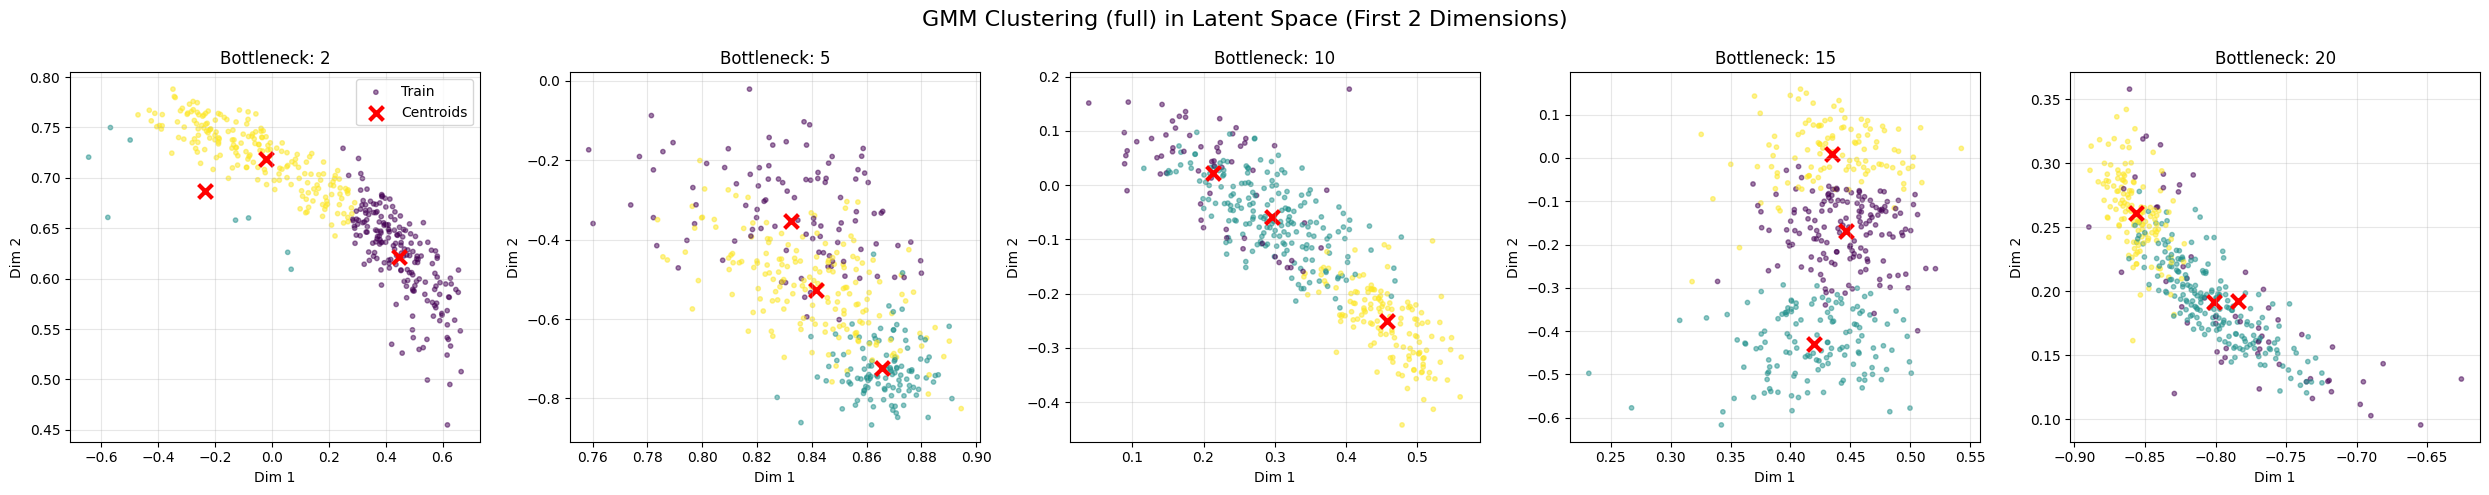

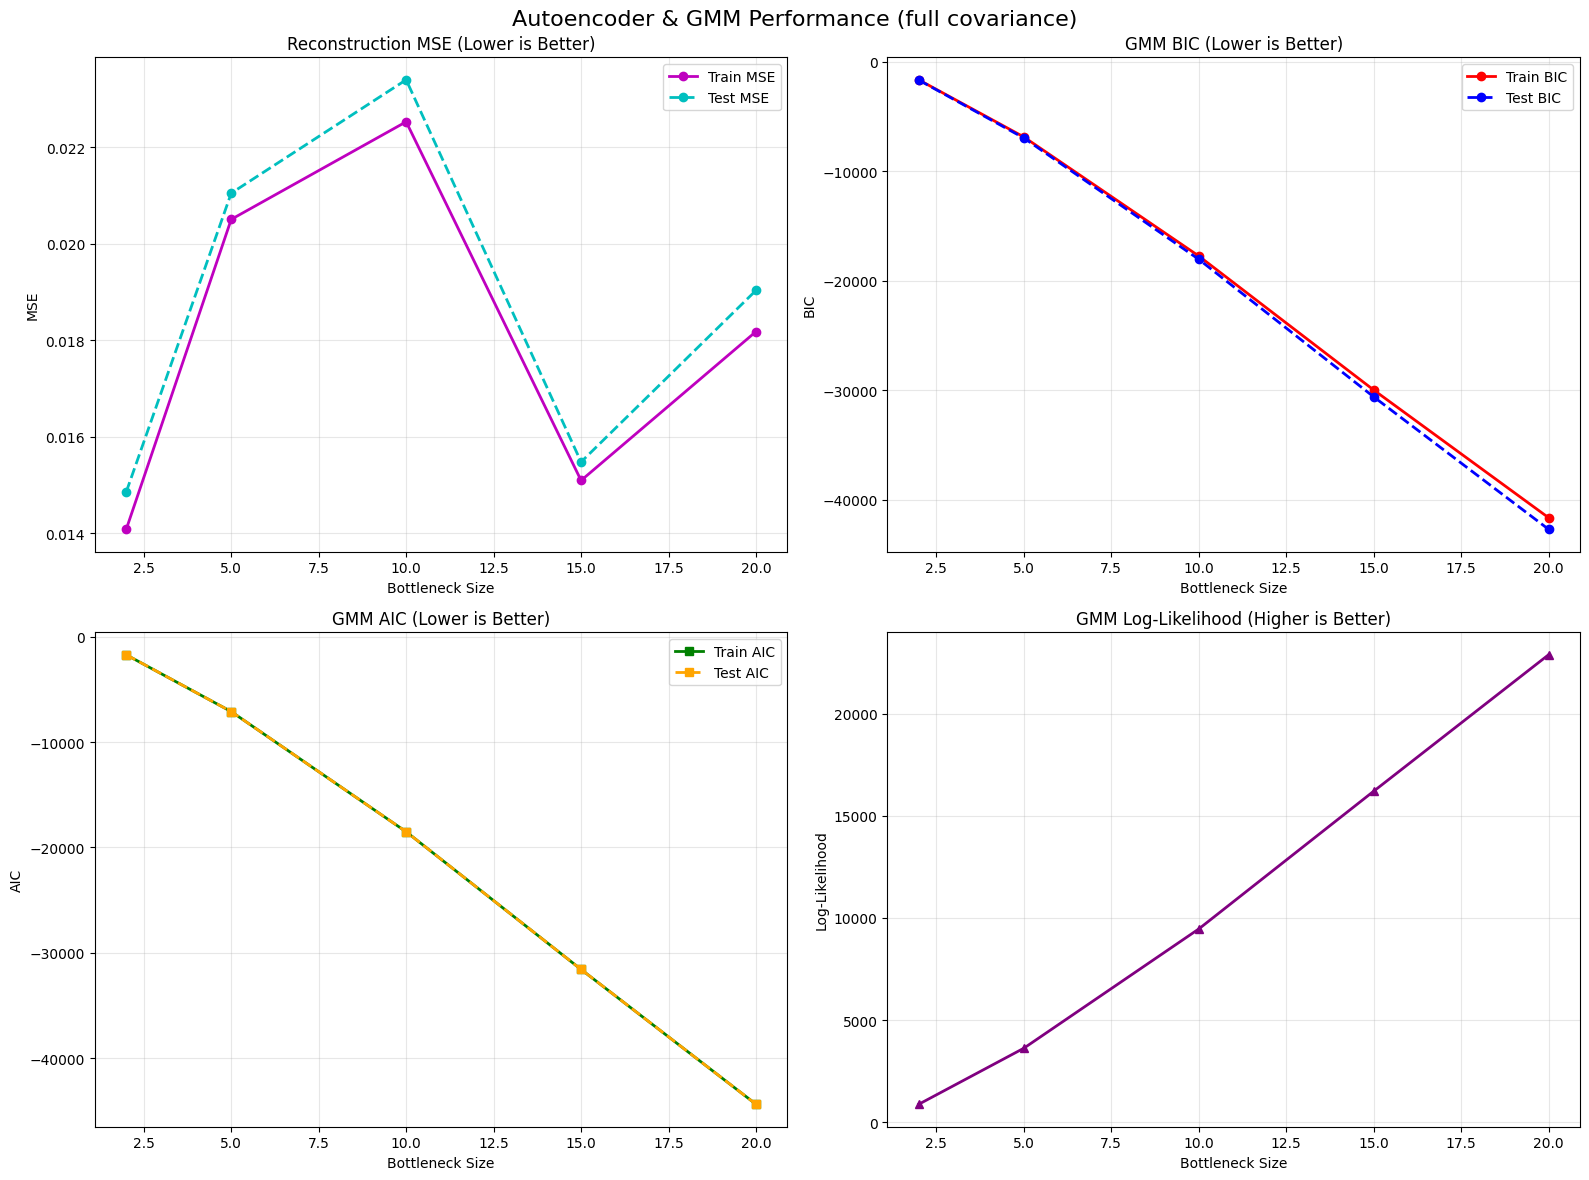


Testing Covariance Type: TIED

Evaluating Bottleneck size 2...
Train MSE: 0.014085 | Test MSE: 0.014859
Train BIC: -1420.26 | Test BIC: -1437.11
Train AIC: -1464.11 | Test AIC: -1464.11

Evaluating Bottleneck size 5...
Train MSE: 0.020508 | Test MSE: 0.021051
Train BIC: -6652.29 | Test BIC: -6701.31
Train AIC: -6779.85 | Test AIC: -6779.85

Evaluating Bottleneck size 10...
Train MSE: 0.022531 | Test MSE: 0.023401
Train BIC: -17184.97 | Test BIC: -17318.26
Train AIC: -17531.79 | Test AIC: -17531.79

Evaluating Bottleneck size 15...
Train MSE: 0.015096 | Test MSE: 0.015479
Train BIC: -28270.64 | Test BIC: -28526.50
Train AIC: -28936.38 | Test AIC: -28936.38

Evaluating Bottleneck size 20...
Train MSE: 0.018182 | Test MSE: 0.019037
Train BIC: -39509.55 | Test BIC: -39926.28
Train AIC: -40593.87 | Test AIC: -40593.87


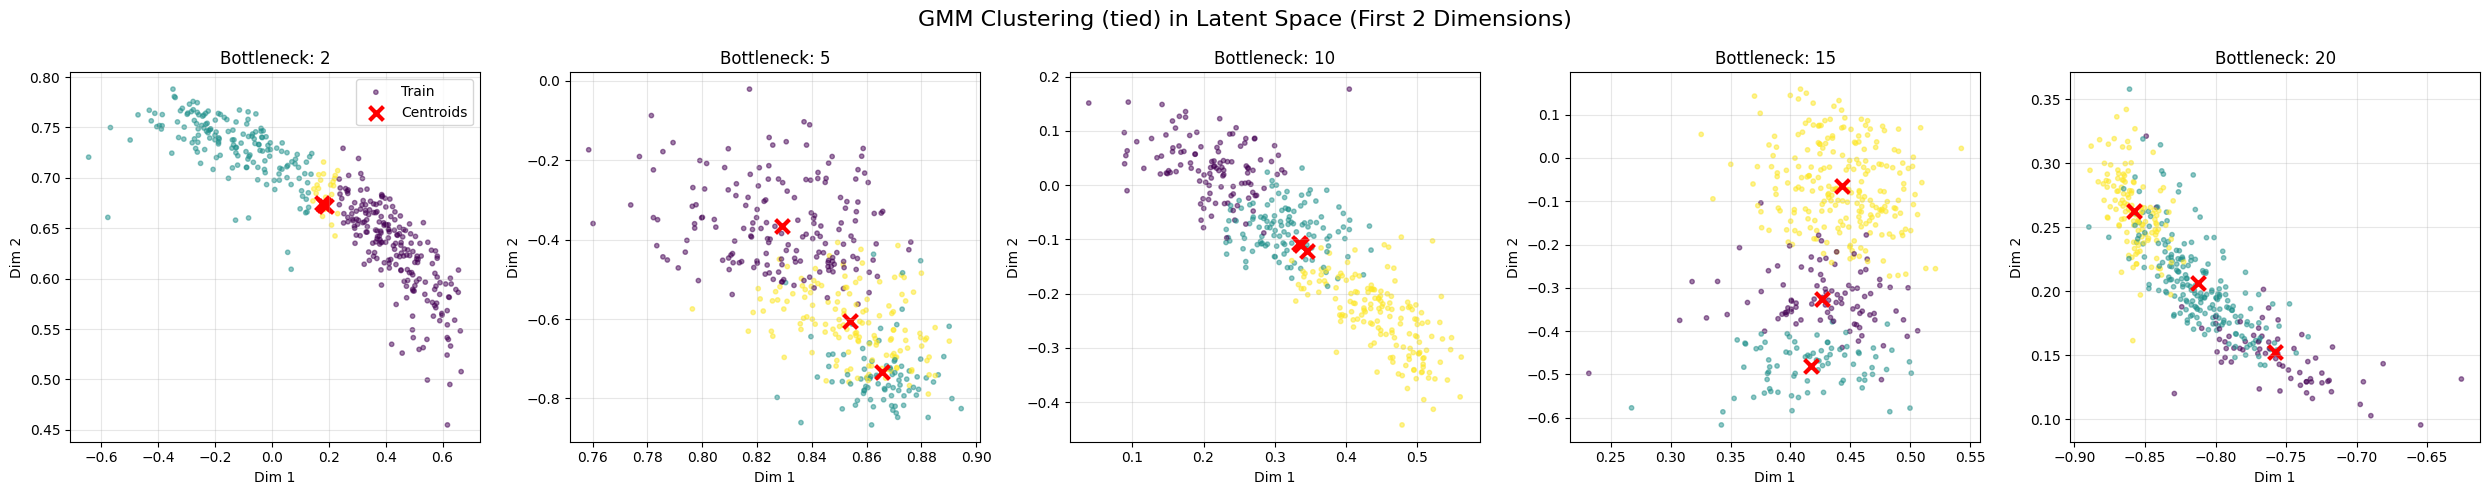

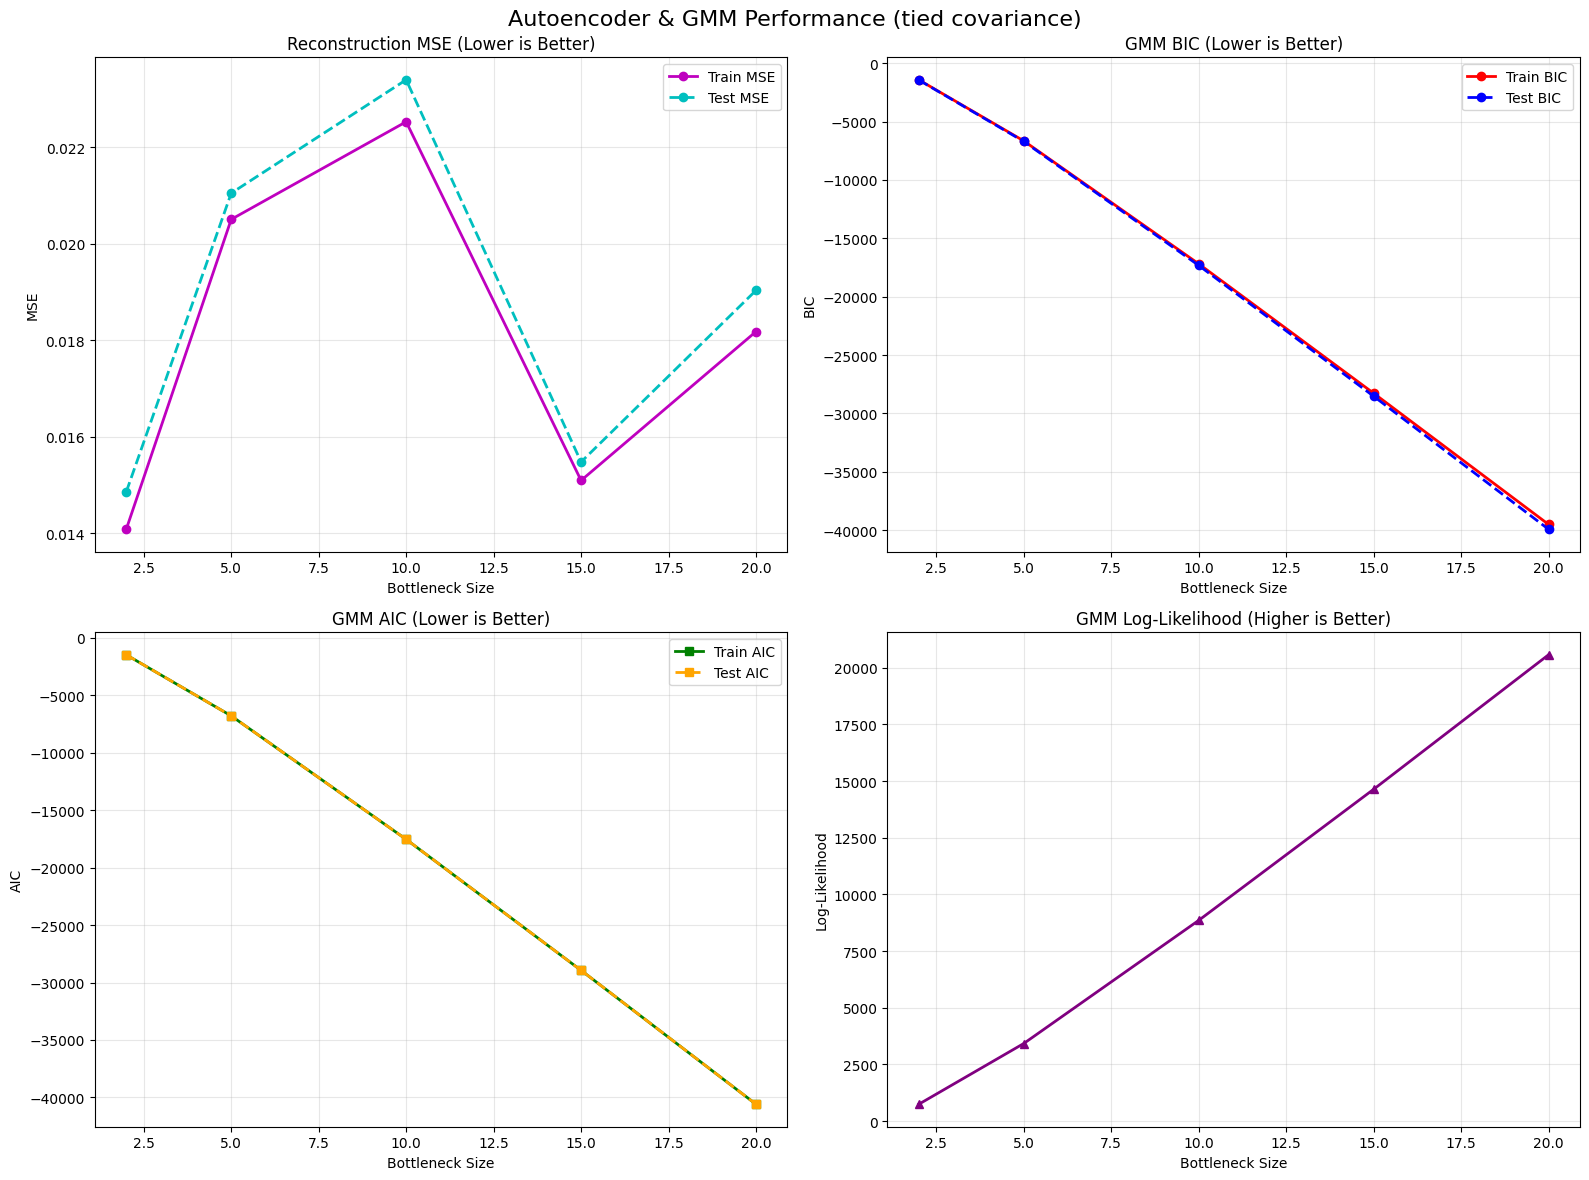


Testing Covariance Type: DIAGONAL

Evaluating Bottleneck size 2...
Train MSE: 0.014085 | Test MSE: 0.014859
Train BIC: -1515.55 | Test BIC: -1537.00
Train AIC: -1571.36 | Test AIC: -1571.36

Evaluating Bottleneck size 5...
Train MSE: 0.020508 | Test MSE: 0.021051
Train BIC: -4906.79 | Test BIC: -4955.81
Train AIC: -5034.35 | Test AIC: -5034.35

Evaluating Bottleneck size 10...
Train MSE: 0.022531 | Test MSE: 0.023401
Train BIC: -13244.54 | Test BIC: -13339.53
Train AIC: -13491.70 | Test AIC: -13491.70

Evaluating Bottleneck size 15...
Train MSE: 0.015096 | Test MSE: 0.015479
Train BIC: -15507.94 | Test BIC: -15648.89
Train AIC: -15874.69 | Test AIC: -15874.69

Evaluating Bottleneck size 20...
Train MSE: 0.018182 | Test MSE: 0.019037
Train BIC: -22143.25 | Test BIC: -22330.17
Train AIC: -22629.60 | Test AIC: -22629.60


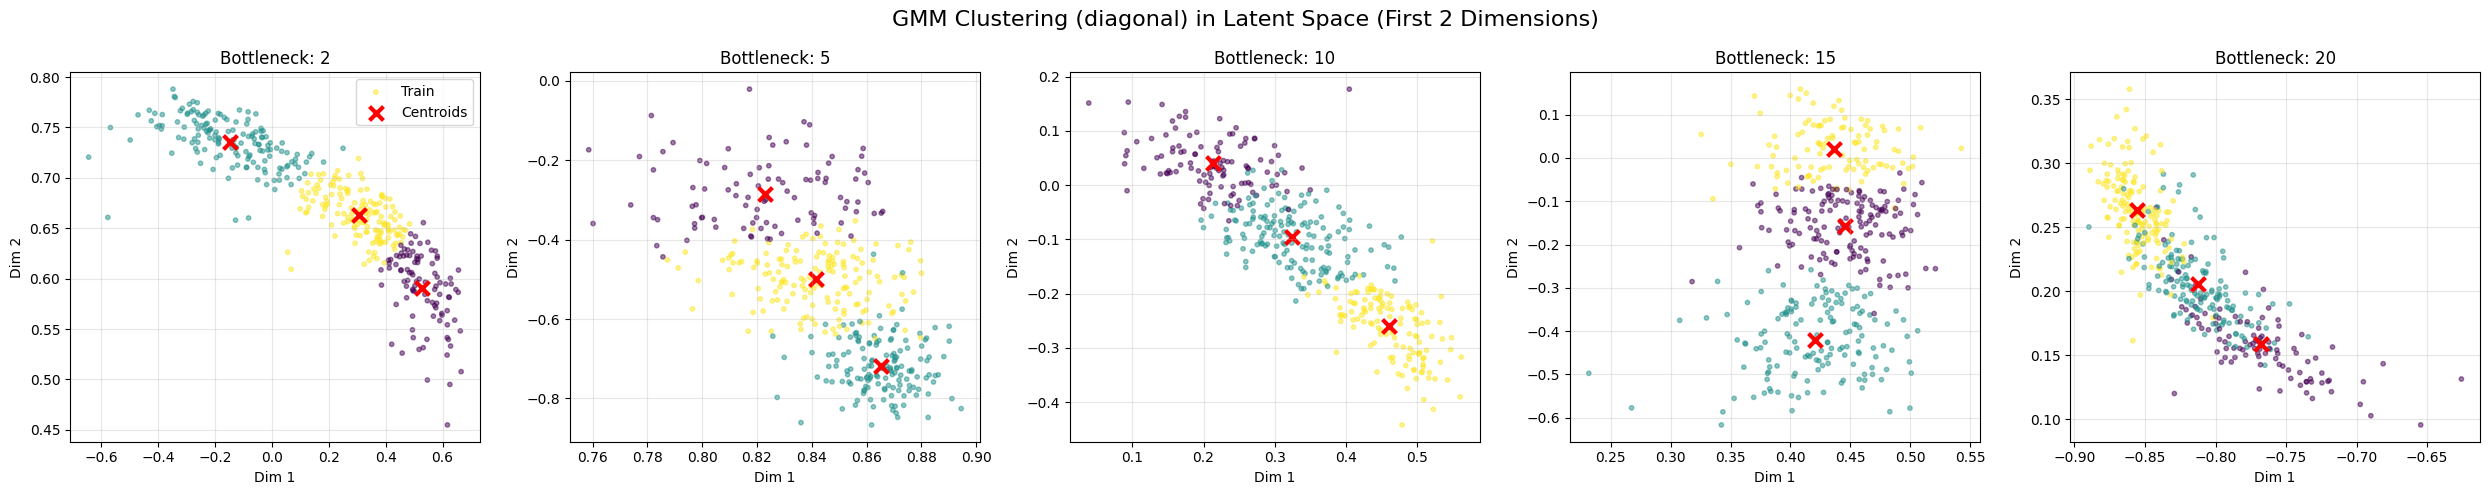

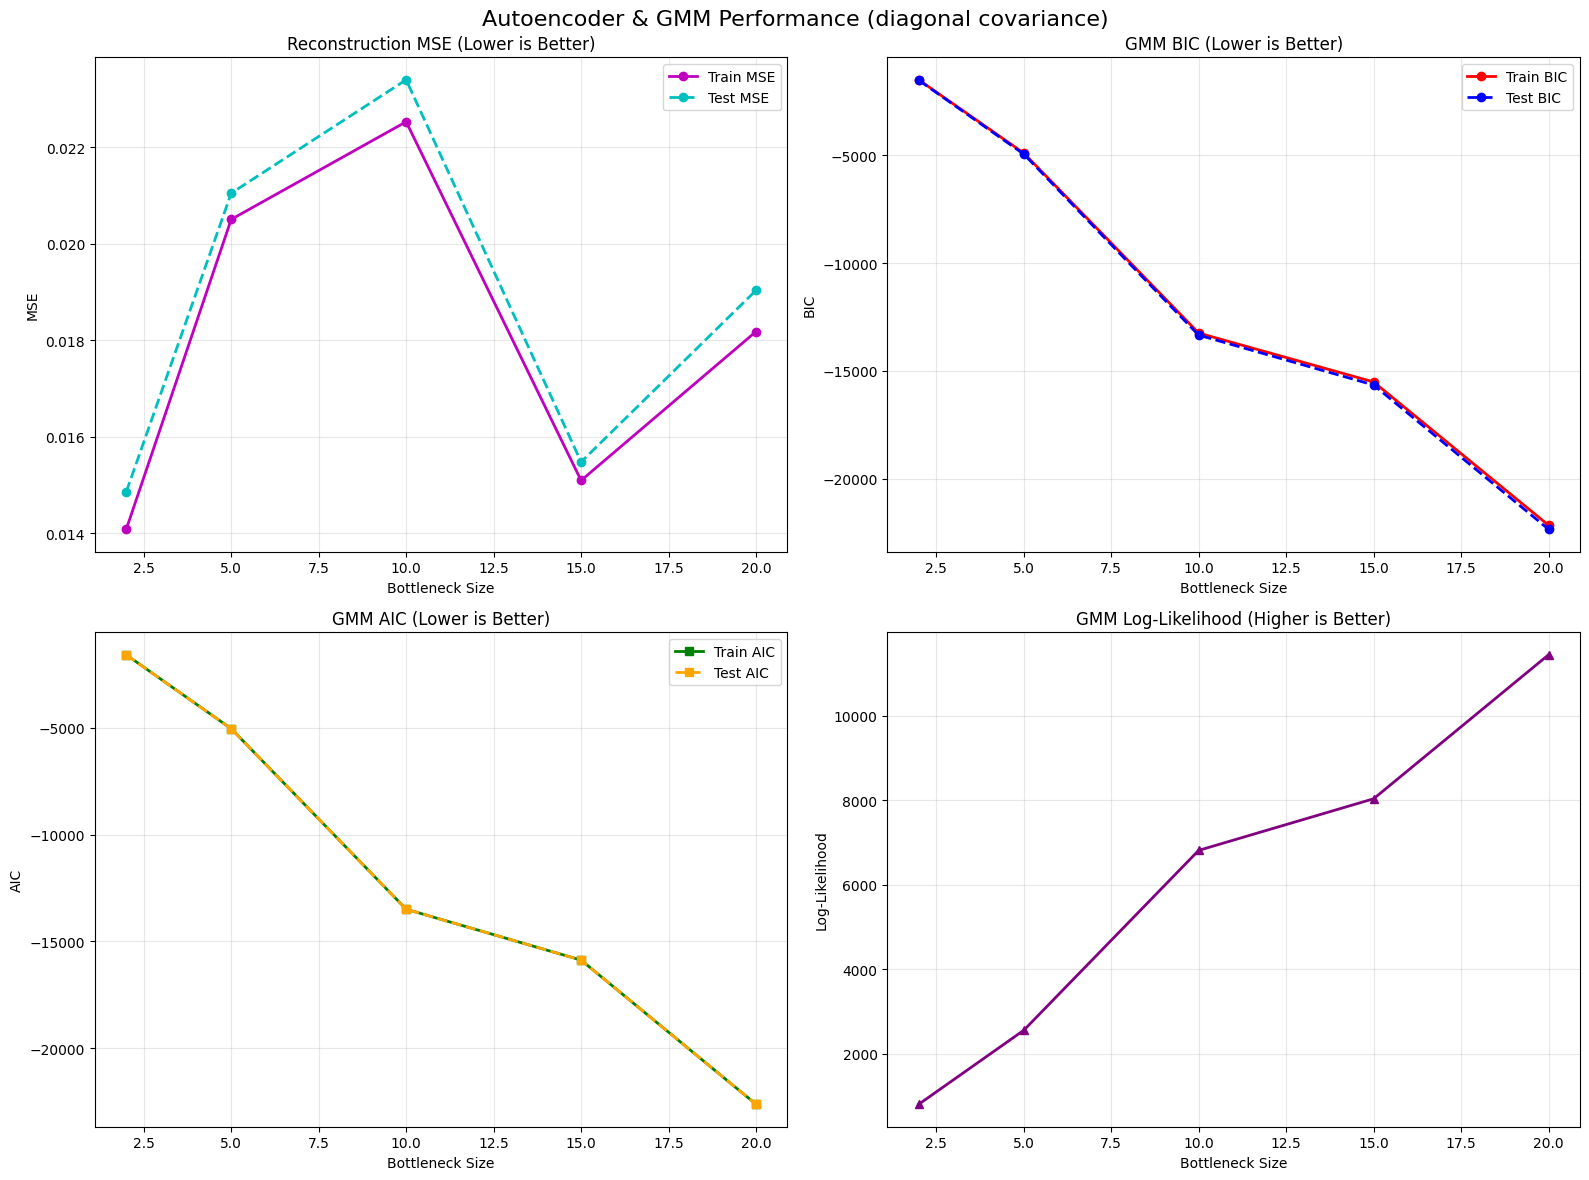


Testing Covariance Type: SPHERICAL

Evaluating Bottleneck size 2...
Train MSE: 0.014085 | Test MSE: 0.014859
Train BIC: -943.29 | Test BIC: -960.15
Train AIC: -987.14 | Test AIC: -987.14

Evaluating Bottleneck size 5...
Train MSE: 0.020508 | Test MSE: 0.021051
Train BIC: -4017.77 | Test BIC: -4048.41
Train AIC: -4097.50 | Test AIC: -4097.50

Evaluating Bottleneck size 10...
Train MSE: 0.022531 | Test MSE: 0.023401
Train BIC: -12492.16 | Test BIC: -12545.79
Train AIC: -12631.69 | Test AIC: -12631.69

Evaluating Bottleneck size 15...
Train MSE: 0.015096 | Test MSE: 0.015479
Train BIC: -12569.36 | Test BIC: -12645.97
Train AIC: -12768.69 | Test AIC: -12768.69

Evaluating Bottleneck size 20...
Train MSE: 0.018182 | Test MSE: 0.019037
Train BIC: -19990.20 | Test BIC: -20089.78
Train AIC: -20249.32 | Test AIC: -20249.32


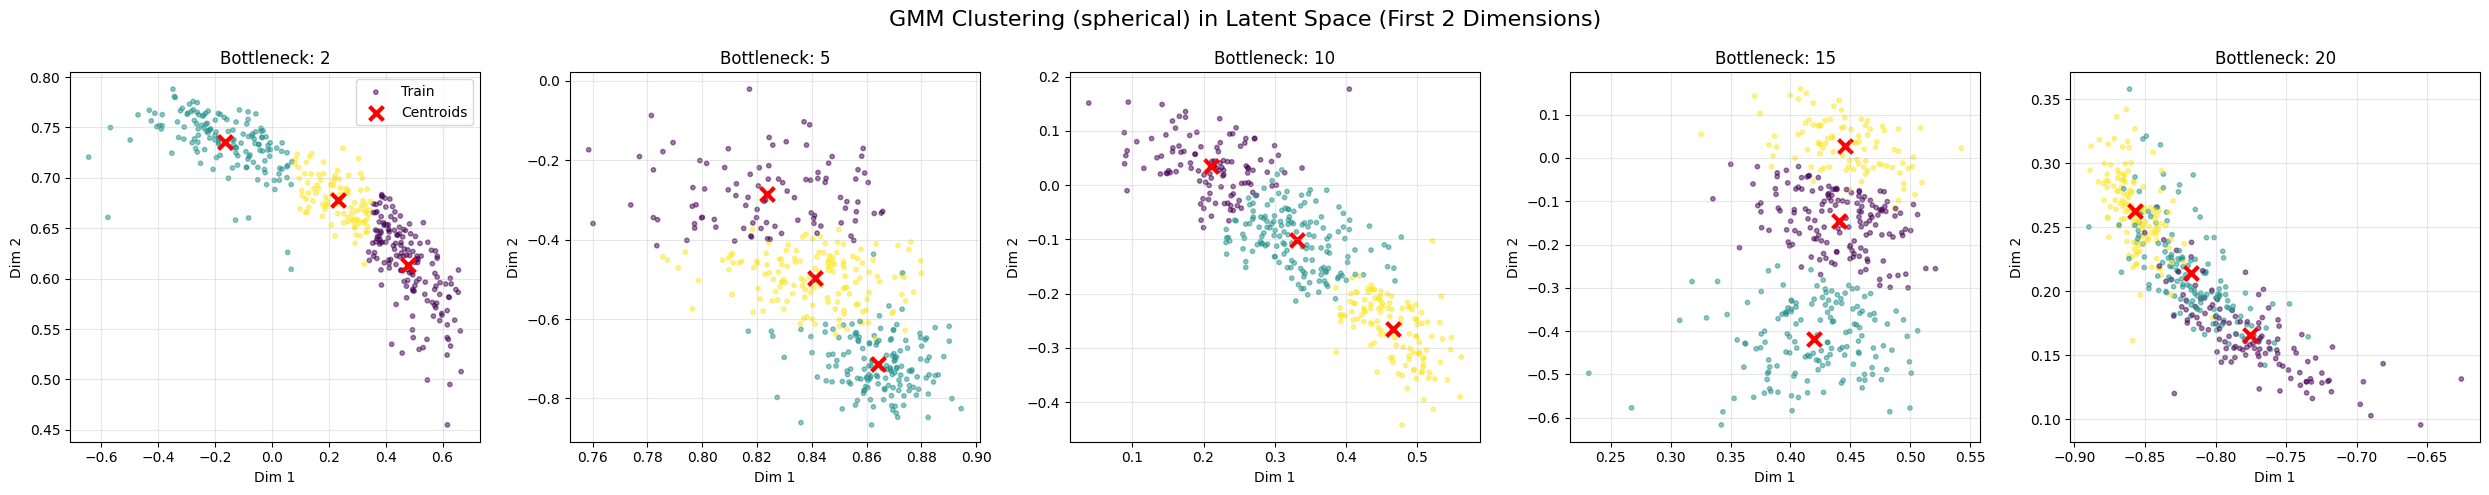

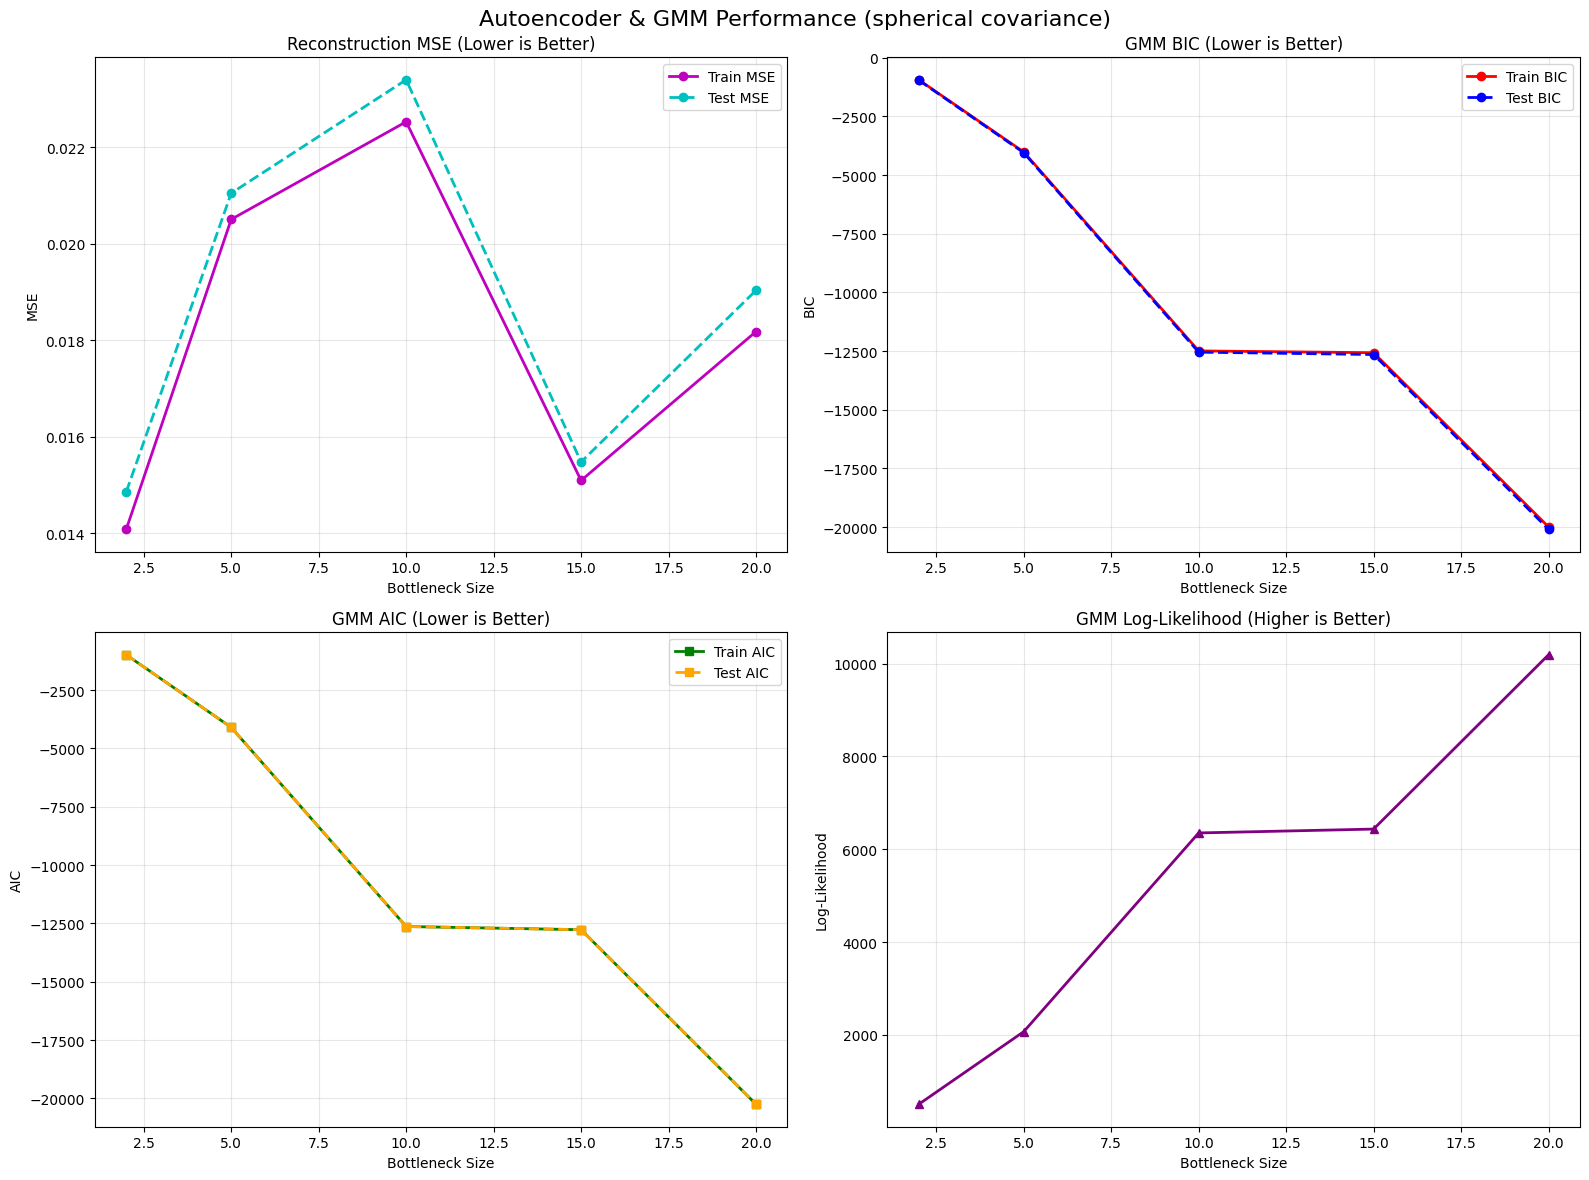

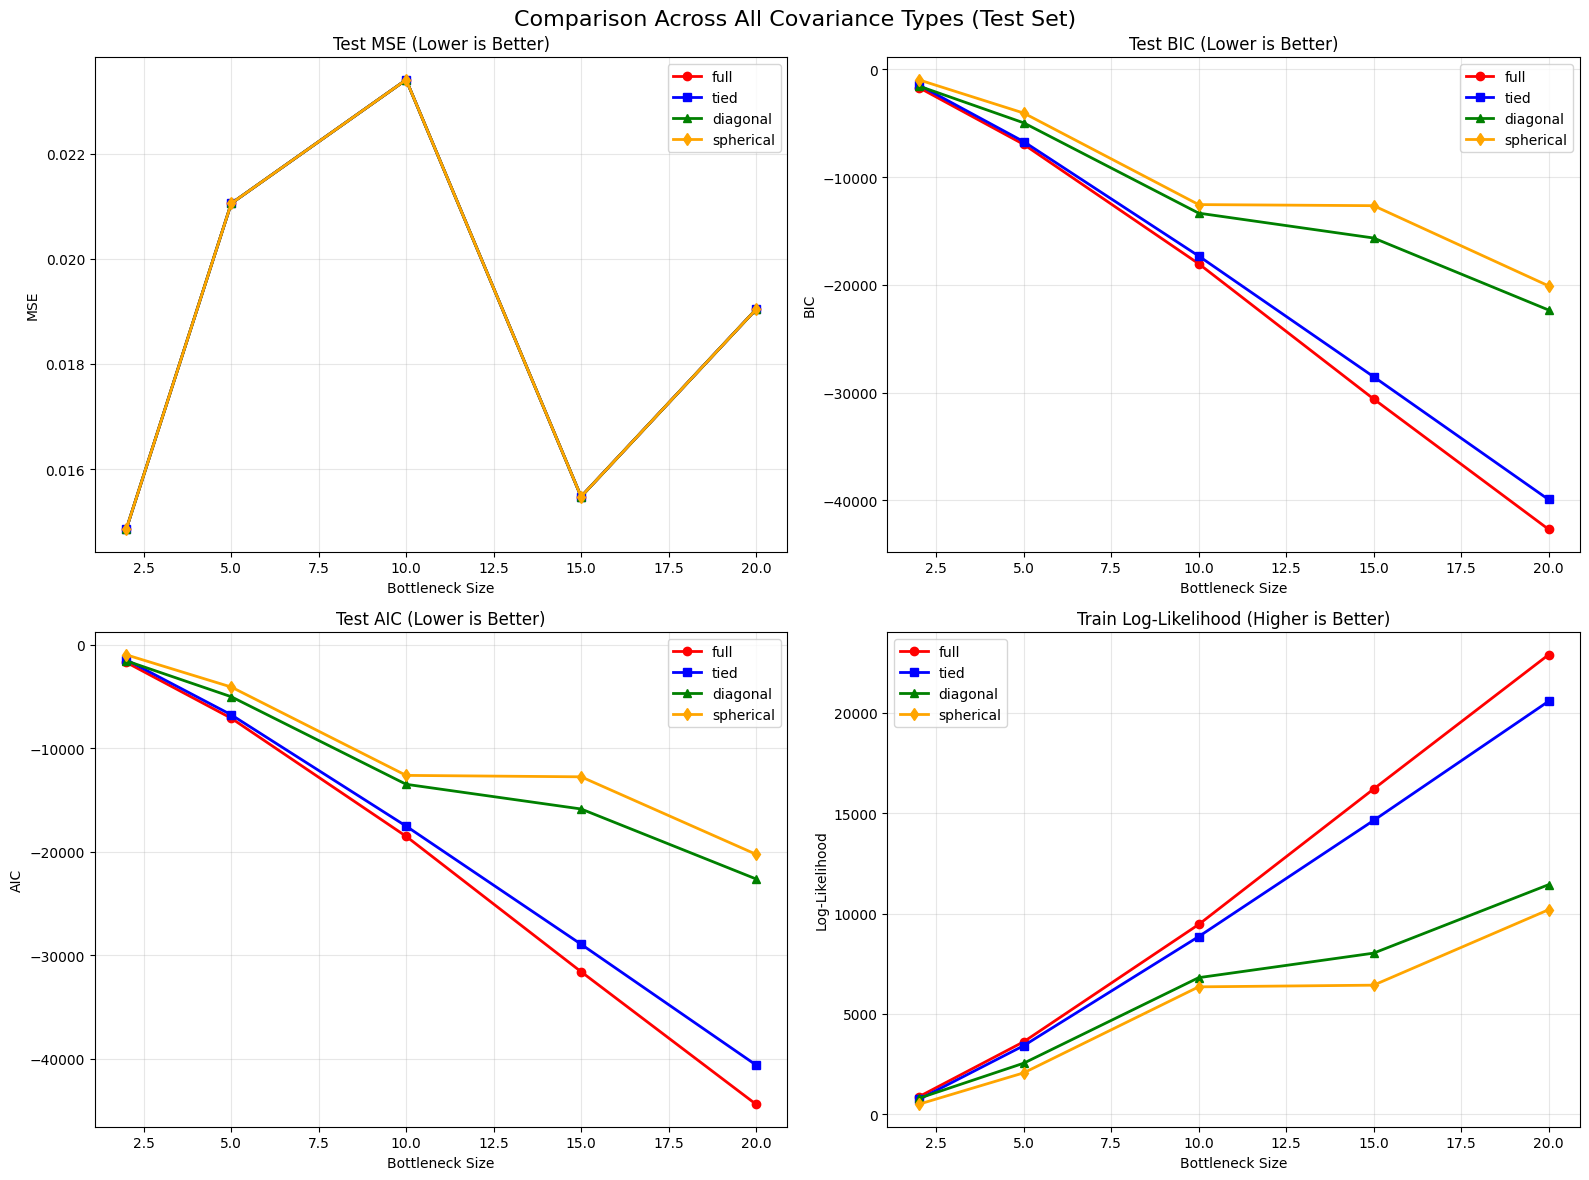


SUMMARY: Best Configuration by Metric (Test Set)
TEST_MSE: full covariance, bottleneck=2 (value=0.0149)
TEST_BIC: full covariance, bottleneck=20 (value=-42688.5137)
TEST_AIC: full covariance, bottleneck=20 (value=-44386.9221)


In [25]:
from gmm import *

bottle_neck_sizes = [2, 5, 10, 15, 20]
covariance_types = ['full', 'tied', 'diagonal', 'spherical']

# Store results for each covariance type
all_results = {}

for cov_type in covariance_types:
    print(f"\n{'='*60}")
    print(f"Testing Covariance Type: {cov_type.upper()}")
    print(f"{'='*60}")
    
    results = {
        'size': [],
        'train_mse': [],
        'test_mse': [],
        'train_bic': [],
        'test_bic': [],
        'train_aic': [],
        'test_aic': [],
        'train_llh': []
    }
    
    # Setup figure for Clustering Visualization for this covariance type
    fig_clusters, axes_clusters = plt.subplots(1, len(bottle_neck_sizes), figsize=(25, 5))
    fig_clusters.suptitle(f'GMM Clustering ({cov_type}) in Latent Space (First 2 Dimensions)', fontsize=16)
    
    for idx, i in enumerate(bottle_neck_sizes):
        print(f"\nEvaluating Bottleneck size {i}...")
        
        # 1. Train Autoencoder
        autoencoder = Autoencoder(
            x_train_scaled.shape[1], 
            [30, 28, 24], 
            i, 
            [24, 28, 30], 
            'tanh', 
            0.01, 
            0.01
        )
        autoencoder.fit(x_train_scaled, epochs=50, verbose=False)
        
        # 2. Encode train and test
        encoded_train = autoencoder.encode(x_train_scaled)
        encoded_test = autoencoder.encode(x_test_scaled)
        
        # 3. Fit GMM on train data with current covariance type
        model = GMM(n_components=3, covariance_type=cov_type, max_iter=100)
        model.fit(encoded_train)
        
        # 4. Evaluate on train
        train_bic = model.bic(encoded_train)
        train_aic = model.aic(encoded_train)
        train_llh = model.log_likelihood_history[-1]
        train_labels = model.predict(encoded_train)
        train_mse = autoencoder.evaluate_mse(x_train_scaled)
        
        # 5. Evaluate on test
        test_bic = model.bic(encoded_test)
        test_aic = model.aic(encoded_test)
        test_labels = model.predict(encoded_test)
        test_mse = autoencoder.evaluate_mse(x_test_scaled)
        
        # 6. Store results
        results['size'].append(i)
        results['train_mse'].append(train_mse)
        results['test_mse'].append(test_mse)
        results['train_bic'].append(train_bic)
        results['test_bic'].append(test_bic)
        results['train_aic'].append(train_aic)
        results['test_aic'].append(test_aic)
        results['train_llh'].append(train_llh)
        
        print(f"Train MSE: {train_mse:.6f} | Test MSE: {test_mse:.6f}")
        print(f"Train BIC: {train_bic:.2f} | Test BIC: {test_bic:.2f}")
        print(f"Train AIC: {train_aic:.2f} | Test AIC: {test_aic:.2f}")
        
        # 7. Plot clustering for this bottleneck size
        ax = axes_clusters[idx]
        ax.scatter(encoded_train[:, 0], encoded_train[:, 1], 
                   c=train_labels, cmap='viridis', s=10, alpha=0.5, label='Train')
        ax.scatter(model.means[:, 0], model.means[:, 1], 
                   c='red', marker='x', s=100, linewidths=3, label='Centroids')
        ax.set_title(f'Bottleneck: {i}')
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        ax.grid(True, alpha=0.3)
        if idx == 0: 
            ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Store results for this covariance type
    all_results[cov_type] = results
    
    # --- Visualization: Train vs Test Comparison ---
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Autoencoder & GMM Performance ({cov_type} covariance)', fontsize=16)
    
    # 1. MSE (Train vs Test)
    axs[0, 0].plot(results['size'], results['train_mse'], 'm-o', label='Train MSE', linewidth=2)
    axs[0, 0].plot(results['size'], results['test_mse'], 'c--o', label='Test MSE', linewidth=2)
    axs[0, 0].set_title('Reconstruction MSE (Lower is Better)')
    axs[0, 0].set_xlabel('Bottleneck Size')
    axs[0, 0].set_ylabel('MSE')
    axs[0, 0].legend()
    axs[0, 0].grid(True, alpha=0.3)
    
    # 2. BIC (Train vs Test)
    axs[0, 1].plot(results['size'], results['train_bic'], 'r-o', label='Train BIC', linewidth=2)
    axs[0, 1].plot(results['size'], results['test_bic'], 'b--o', label='Test BIC', linewidth=2)
    axs[0, 1].set_title('GMM BIC (Lower is Better)')
    axs[0, 1].set_xlabel('Bottleneck Size')
    axs[0, 1].set_ylabel('BIC')
    axs[0, 1].legend()
    axs[0, 1].grid(True, alpha=0.3)
    
    # 3. AIC (Train vs Test)
    axs[1, 0].plot(results['size'], results['train_aic'], 'g-s', label='Train AIC', linewidth=2)
    axs[1, 0].plot(results['size'], results['test_aic'], 'orange', marker='s', linestyle='--', label='Test AIC', linewidth=2)
    axs[1, 0].set_title('GMM AIC (Lower is Better)')
    axs[1, 0].set_xlabel('Bottleneck Size')
    axs[1, 0].set_ylabel('AIC')
    axs[1, 0].legend()
    axs[1, 0].grid(True, alpha=0.3)
    
    # 4. Log-Likelihood (Train only - this is from training history)
    axs[1, 1].plot(results['size'], results['train_llh'], 'purple', marker='^', linewidth=2)
    axs[1, 1].set_title('GMM Log-Likelihood (Higher is Better)')
    axs[1, 1].set_xlabel('Bottleneck Size')
    axs[1, 1].set_ylabel('Log-Likelihood')
    axs[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# --- Final Comparison: All Covariance Types ---
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison Across All Covariance Types (Test Set)', fontsize=16)

colors = ['red', 'blue', 'green', 'orange']
markers = ['o', 's', '^', 'd']

# Plot test metrics for all covariance types
for idx, (cov_type, color, marker) in enumerate(zip(covariance_types, colors, markers)):
    results = all_results[cov_type]
    
    # Test MSE
    axs[0, 0].plot(results['size'], results['test_mse'], 
                   color=color, marker=marker, label=cov_type, linewidth=2)
    
    # Test BIC
    axs[0, 1].plot(results['size'], results['test_bic'], 
                   color=color, marker=marker, label=cov_type, linewidth=2)
    
    # Test AIC
    axs[1, 0].plot(results['size'], results['test_aic'], 
                   color=color, marker=marker, label=cov_type, linewidth=2)
    
    # Train LLH
    axs[1, 1].plot(results['size'], results['train_llh'], 
                   color=color, marker=marker, label=cov_type, linewidth=2)

axs[0, 0].set_title('Test MSE (Lower is Better)')
axs[0, 0].set_xlabel('Bottleneck Size')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()
axs[0, 0].grid(True, alpha=0.3)

axs[0, 1].set_title('Test BIC (Lower is Better)')
axs[0, 1].set_xlabel('Bottleneck Size')
axs[0, 1].set_ylabel('BIC')
axs[0, 1].legend()
axs[0, 1].grid(True, alpha=0.3)

axs[1, 0].set_title('Test AIC (Lower is Better)')
axs[1, 0].set_xlabel('Bottleneck Size')
axs[1, 0].set_ylabel('AIC')
axs[1, 0].legend()
axs[1, 0].grid(True, alpha=0.3)

axs[1, 1].set_title('Train Log-Likelihood (Higher is Better)')
axs[1, 1].set_xlabel('Bottleneck Size')
axs[1, 1].set_ylabel('Log-Likelihood')
axs[1, 1].legend()
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("SUMMARY: Best Configuration by Metric (Test Set)")
print("="*60)

for metric in ['test_mse', 'test_bic', 'test_aic']:
    best_value = float('inf')
    best_config = None
    
    for cov_type in covariance_types:
        results = all_results[cov_type]
        min_val = min(results[metric])
        min_idx = results[metric].index(min_val)
        
        if min_val < best_value:
            best_value = min_val
            best_config = (cov_type, results['size'][min_idx])
    
    print(f"{metric.upper()}: {best_config[0]} covariance, bottleneck={best_config[1]} (value={best_value:.4f})")